# Finance Operations Analysis — Synthetic Data Project

### **Project Overview**
This notebook analyzes synthetic financial operations data for a mock banking environment.  
It simulates monthly revenue, cost, and profit across different products and client segments.

### **Why This Notebook is Valuable**
- Demonstrates real data analysis workflow  
- Shows skills in Python (Pandas, NumPy, Matplotlib), data cleaning, visualization  
- Professional, GitHub-ready structure  
- Can be reused for real datasets later

---

### **Objectives**
1. Load and explore the synthetic finance dataset  
2. Clean and prepare the data for analysis  
3. Create insightful visualizations: trends, product performance, profit  
4. Interpret results like a financial analyst  
5. Make this notebook clear enough for recruiters and collaborators


## 1. Librairies / Settings

In [87]:
import pandas as pd               # For tabular data operations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path          # For robust file paths

# Make plots look nice
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 12

## 2. Load the Dataset

We generated synthetic data with `create_synthetic_data.py` and saved it into `data/raw/finance_operations.csv`.

**Steps:**
1. Define project paths (raw & processed data)
2. Load raw data

In [88]:
# Current working directory (where Jupyter started)
CWD = Path.cwd()

# Go up to project root (if notebook is in /notebooks/)
PROJECT_ROOT = CWD.parent
# PROJECT_ROOT = CWD.parents[1]  # if notebook nested one more level deeper

# Build path to raw and processed CSV data
raw_csv_path = PROJECT_ROOT / "data" / "raw" / "finance_operations.csv"
processed_csv_path = PROJECT_ROOT / "data" / "processed" / "finance_operations_processed.csv"

# Ensure processed folder exists
(PROJECT_ROOT / "data/processed").mkdir(parents=True, exist_ok=True)

# Load the raw CSV into DataFrame df
df = pd.read_csv(raw_csv_path, parse_dates=["Month"])

# Preview first 5 rows
df.head()

,Month,Product,ClientSegment,RevenueCHF,CostCHF
0,2024-01-01,Equity,Private,492559,219343
1,2024-01-01,Equity,Corporate,409957,152285
2,2024-01-01,Equity,Institutional,425585,231441
3,2024-01-01,Bonds,Private,470071,248649
4,2024-01-01,Bonds,Corporate,389770,182043


## 2. Data Cleaning & Preparation

**Steps:**
1. Add calculated columns (e.g., Profit, Profit Margin (%))
2. Clean/verify missing values
3. Save processed data to `data/processed/`

In [89]:
# Add Profit column
df["ProfitCHF"] = df["RevenueCHF"] - df["CostCHF"]

# Add Profit Margin column
df["ProfitMarginPct"] = (df["ProfitCHF"] / df["RevenueCHF"]) * 100

# Optional: Set Month as index (for plotting later)
df.set_index("Month", inplace=True)

# Check data types & missing values
print("Data Info:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

# Save processed data
df.to_csv(processed_csv_path, index=True)  # index=True keeps Month as index

print(f"Processed data saved at: {processed_csv_path.resolve()}")

Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2024-01-01 to 2024-12-01
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product          108 non-null    object 
 1   ClientSegment    108 non-null    object 
 2   RevenueCHF       108 non-null    int64  
 3   CostCHF          108 non-null    int64  
 4   ProfitCHF        108 non-null    int64  
 5   ProfitMarginPct  108 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 5.9+ KB
None

Missing values per column:
Product            0
ClientSegment      0
RevenueCHF         0
CostCHF            0
ProfitCHF          0
ProfitMarginPct    0
dtype: int64
Processed data saved at: /Users/mamefatylo/Desktop/Career/Data Analyst Projects/data-operations-automation/data/processed/finance_operations_processed.csv


## 3. Exploratory Data Analysis (EDA)

We will explore the processed dataset (`finance_operations_processed.csv`) including:

- Revenue, Cost, Profit over time  
- Profit by Product and Profit by Client Segment
- Profit Margin (%) by Product and Client Segment  
- Revenue distribution heatmap 

In [90]:
# Gridlines and clean style for plots
sns.set_style("whitegrid")

# Load processed data
df = pd.read_csv(processed_csv_path, parse_dates=["Month"], index_col="Month")

# Verify data loaded correctly
df.head()

,Product,ClientSegment,RevenueCHF,CostCHF,ProfitCHF,ProfitMarginPct
Month,,,,,,
2024-01-01,Equity,Private,492559,219343,273216,55.468685
2024-01-01,Equity,Corporate,409957,152285,257672,62.853421
2024-01-01,Equity,Institutional,425585,231441,194144,45.618149
2024-01-01,Bonds,Private,470071,248649,221422,47.103948
2024-01-01,Bonds,Corporate,389770,182043,207727,53.294764


### 3.1 Monthly Revenue, Cost & Profit Over Time (line chart)

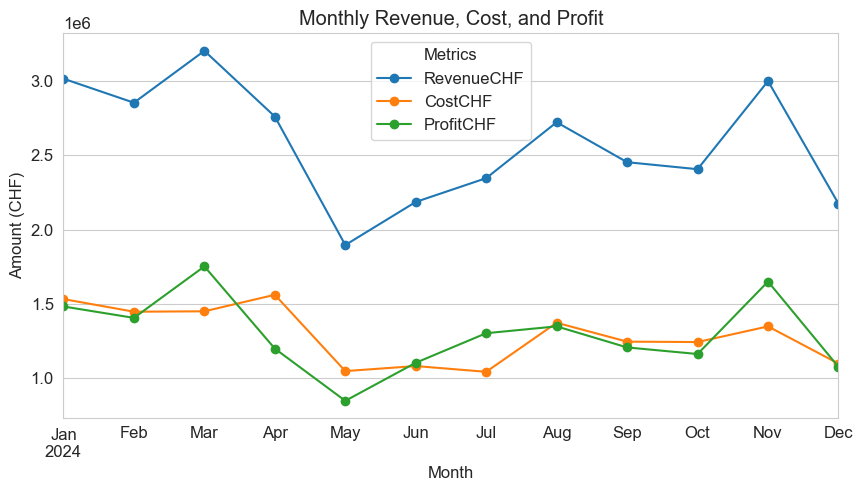

In [91]:
monthly_totals = df.groupby(df.index)[["RevenueCHF", "CostCHF", "ProfitCHF"]].sum() # Aggregate data by Month
monthly_totals.plot(marker="o") # line plot with dots on each month
plt.title("Monthly Revenue, Cost, and Profit")
plt.xlabel("Month")
plt.ylabel("Amount (CHF)")
plt.grid(True)
plt.legend(title="Metrics")  # Add legend with title
plt.show()

### 3.2 Profit by Product (bar chart)

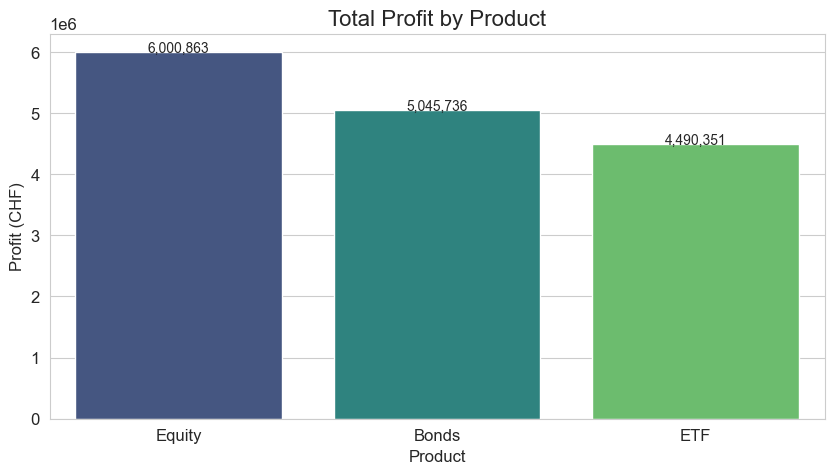

In [92]:
product_profit = df.groupby("Product")["ProfitCHF"].sum().sort_values(ascending=False) # Aggregate profit by product

# Convert to DataFrame for Seaborn
product_profit_df = product_profit.reset_index() # Move Product from index to column
product_profit_df.columns = ["Product", "ProfitCHF"] # Rename columns for clarity

# Barplot with multiple colors
sns.barplot(
    data=product_profit_df,
    x="Product",
    y="ProfitCHF",
    hue="Product", # assign x variable to hue
    dodge=False,     # prevent multiple bars
    palette="viridis", # multi-color bars
    legend=False      # remove duplicate legend
)

plt.title("Total Profit by Product", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Profit (CHF)", fontsize=12)

# Optional: Add values on top of bars
for i, val in enumerate(product_profit_df["ProfitCHF"]):
    plt.text(i, val + 5000, f"{val:,}", ha="center", fontsize=10)

plt.show()


### 3.3 Total Profit by Client Segment

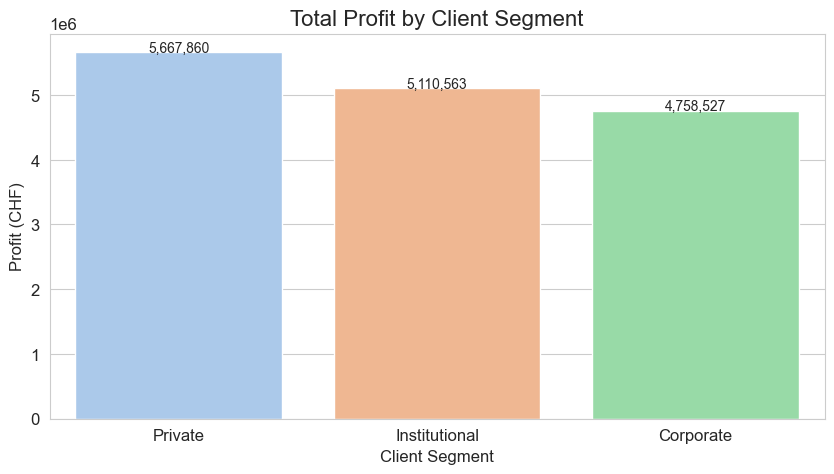

In [93]:
client_profit = df.groupby("ClientSegment")["ProfitCHF"].sum().sort_values(ascending=False)
client_profit_df = client_profit.reset_index() # Move Product from index to column
client_profit_df.columns = ["ClientSegment", "ProfitCHF"] # Rename columns for clarity

sns.barplot(
    data=client_profit_df,
    x="ClientSegment",
    y="ProfitCHF",
    hue="ClientSegment", # assign x variable to hue
    dodge=False,     # prevent multiple bars
    palette="pastel", # multi-color bars
    legend=False      # remove duplicate legend
)

plt.title("Total Profit by Client Segment", fontsize=16)
plt.xlabel("Client Segment", fontsize=12)
plt.ylabel("Profit (CHF)", fontsize=12)

for i, val in enumerate(client_profit_df["ProfitCHF"]):
    plt.text(i, val + 5000, f"{val:,}", ha="center", fontsize=10)

plt.show()

### 3.4 Revenue Heatmap by Product & Client Segment

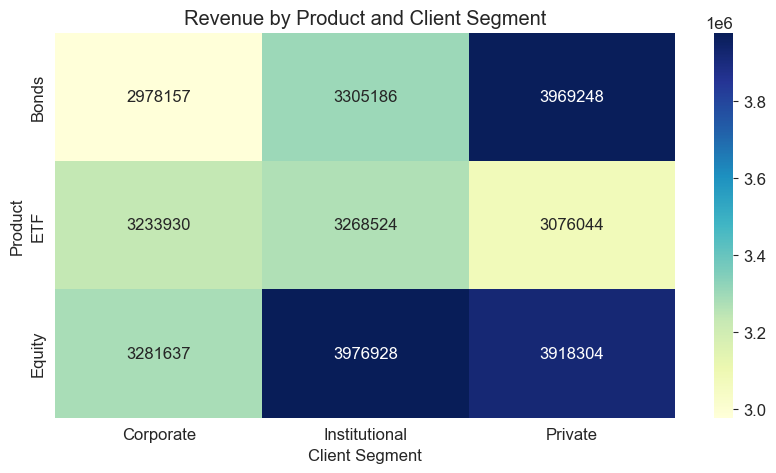

In [94]:
# Pivot table
pivot_table = df.pivot_table(values="RevenueCHF", index="Product", columns="ClientSegment", aggfunc="sum")

# Heatmap
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")  # annot=True shows numbers
plt.title("Revenue by Product and Client Segment")
plt.ylabel("Product")
plt.xlabel("Client Segment")
plt.show()

### 3.5 Profit Margin Analysis

Profit Margin (%) is the percentage of revenue that becomes profit

**Average Profit Margin by Product**

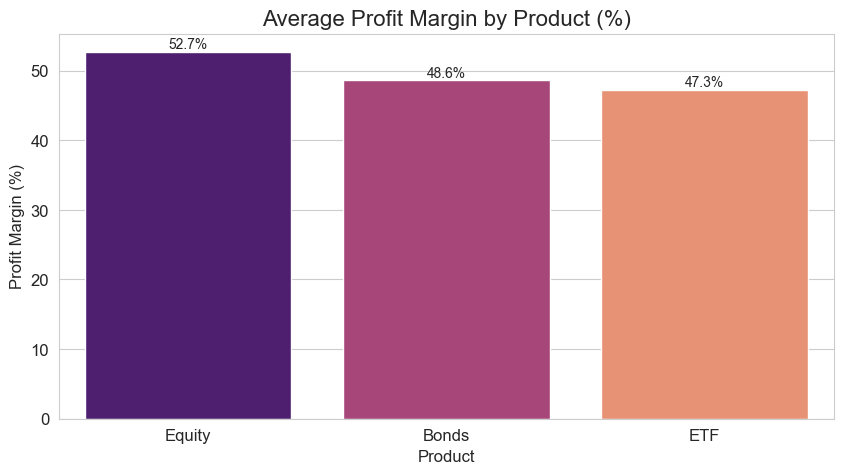

In [97]:
# Aggregate by Product
product_margin = df.groupby("Product")["ProfitMarginPct"].mean().sort_values(ascending=False)
product_margin_df = product_margin.reset_index()
product_margin_df.columns = ["Product", "AvgProfitMarginPct"]

# Barplot
sns.barplot(
    data=product_margin_df,
    x="Product",
    y="AvgProfitMarginPct",
    hue="Product",      # multi-color bars
    dodge=False,
    palette="magma",
    legend=False
)

plt.title("Average Profit Margin by Product (%)", fontsize=16)
plt.ylabel("Profit Margin (%)")
plt.xlabel("Product")

# Add numeric labels
for i, val in enumerate(product_margin_df["AvgProfitMarginPct"]):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha="center", fontsize=10)

plt.show()

**Average Profit Margin by Client Segment**

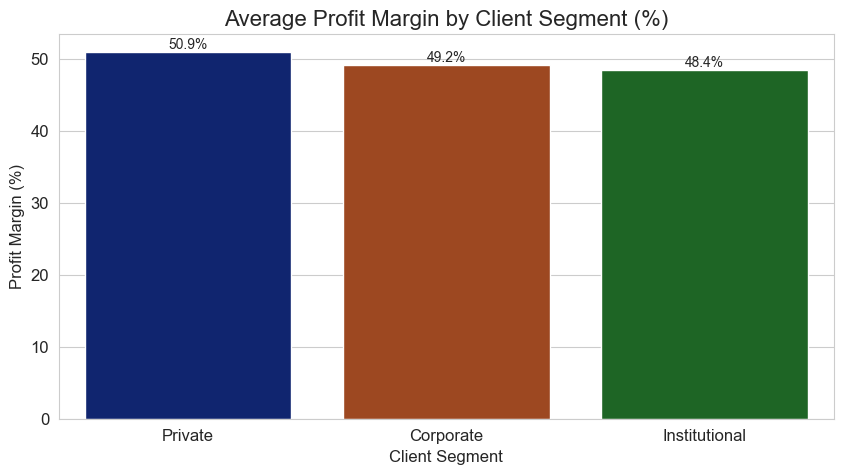

In [96]:
# Aggregate by Client Segment
client_margin = df.groupby("ClientSegment")["ProfitMarginPct"].mean().sort_values(ascending=False)
client_margin_df = client_margin.reset_index()
client_margin_df.columns = ["ClientSegment", "AvgProfitMarginPct"]

# Barplot
sns.barplot(
    data=client_margin_df,
    x="ClientSegment",
    y="AvgProfitMarginPct",
    hue="ClientSegment",
    dodge=False,
    palette="dark",
    legend=False
)

plt.title("Average Profit Margin by Client Segment (%)", fontsize=16)
plt.ylabel("Profit Margin (%)")
plt.xlabel("Client Segment")

# Add numeric labels
for i, val in enumerate(client_margin_df["AvgProfitMarginPct"]):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha="center", fontsize=10)

plt.show()


## 4. Insights & Interpretation

### 4.1 Monthly Trends
- Revenue, Cost, and Profit follow synthetic monthly patterns as expected, **except between March and April** when Cost increased while Profit decreased.  
- Profit each month is simply **Revenue – Cost**, and totals match the computed `ProfitCHF`.

### 4.2 Profit by Product
- **Equity** has the highest total profit.  
- Followed by **Bonds**, then **ETF**.  
- Absolute profit matches the sum of `ProfitCHF` grouped by Product.

### 4.3 Profit by Client Segment
- **Private clients** generated the most profit.  
- Then **Corporate**, then **Institutional**.  
- Absolute sums confirm that `ProfitCHF` values were calculated correctly.

### 4.4 Revenue Heatmap
- Highest revenue: **Equity sold to Institutional clients**.  
- Heatmap confirms product and client segment distribution patterns.

### 4.5 Profit Margin Insights
- Average **Profit Margin (%)** is higher for **Equity**.  
- Private clients tend to have higher margins than Corporate or Institutional.  
- Keeping in mind that all the values are synthetically generated with similar proportions here, absolute profit and margin % provide **different perspectives on efficiency**: one shows total contribution, the other shows profitability relative to revenue.

### Summary
- Profit and Profit Margin metrics complement each other for **decision-making**.  